# Relative strength index (RSI)

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

FF-6  Relative strength index (RSI)

In [18]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

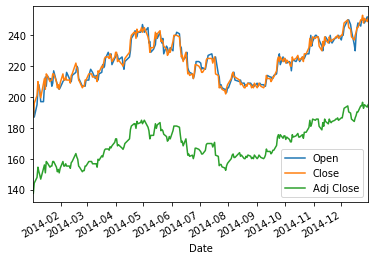

In [19]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

# RSI

Is an oscillator. Has value between 0-100. Evaluate magnitude of value change to assess overbought or oversold.  
[2] calculate RSI using up/down and the end of period. Use n previouse day. [3] derive RSI from EMA and DM (direction movement indicator constructed from max function).  
[9] use n=10,   

In [20]:
inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

n = 5
rsi_5d = RSI(inputs, timeperiod=n)
n = 10
rsi_10d = RSI(inputs, timeperiod=n)
n = 15
rsi_15d = RSI(inputs, timeperiod=n)

daily.loc[:,("RSI-5")] = rsi_5d.tolist()
daily.loc[:,("RSI-10")] = rsi_10d.tolist()
daily.loc[:,("RSI-15")] = rsi_15d.tolist()
daily.tail()

,High,Low,Open,Close,Volume,Adj Close,RSI-5,RSI-10,RSI-15
Date,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,196.590500,82.671838,71.083405,66.954022
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,192.705292,53.963477,57.650188,58.245304
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,195.036407,63.475908,62.388670,61.467276
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,193.482346,54.151555,57.613607,58.256340
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,195.036407,61.264216,60.935694,60.468874


# Plot of SMA on the original time-series

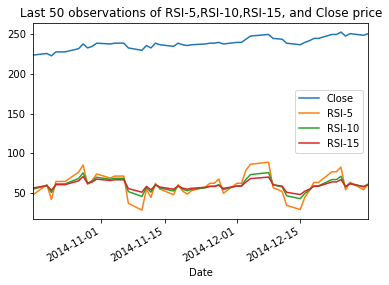

In [21]:
daily[['Close','RSI-5','RSI-10','RSI-15']][-50:].plot(title="Last 50 observations of RSI-5,RSI-10,RSI-15, and Close price")

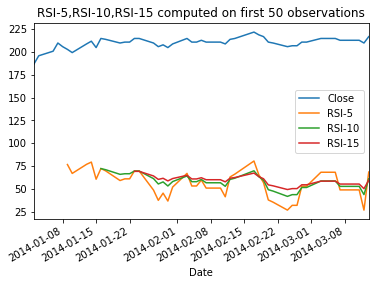

In [22]:
daily[['Close','RSI-5','RSI-10','RSI-15']][:50].plot(title="RSI-5,RSI-10,RSI-15 computed on first 50 observations")